In [1]:
# Imports

import os
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from scripts.datagen.create_dataset import create_dataset
from scripts.utils.params import SolverParams, FNParams

2024-02-01 09:42:22.653293: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 09:42:22.977797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 09:42:22.978006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 09:42:23.035363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 09:42:23.155162: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 09:42:23.156836: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Instance a SolverParams object by reading the parameters from file
s_params = SolverParams.get_from_file(
    "../../scripts/utils/parameters_files/parameters_FN.txt"
)

# Print the parameters
s_params.print_params()

# Instance a FNParams object with the desired constants for the Fitzhug-Nagumo model
fn_params = FNParams(
    k=8, alpha=0.15, epsilon=1e-2, I=0.125, gamma=0.1, grid_size=(20, 20)
)

Solver =  thetamethod
T =  500.0
dt =  0.5
u0 =  [0, 0]
Theta:  0.5
Tolerance:  0.01


In [3]:
# Create the dataset for the Fitzhug-Nagumo model

# choose the name for your dataset
dataset_name = "FN_test"

# choose the number of samples and of processors. Further details inside the README.md file
create_dataset(
    dataset_name=dataset_name,
    num_samples=1,
    num_processes=1,
    model_name="Fitzhug Nagumo",
    solver_params=s_params,
    model_params=fn_params,
    generate=True,
    remove_samples=True,
)

Program finished in 53.85646058400016 seconds


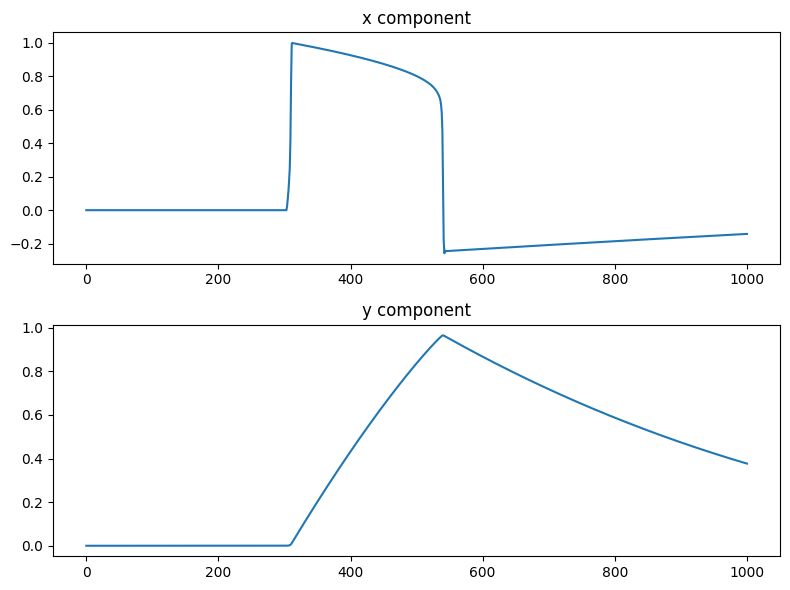

In [4]:
# Plot the trend over time of the point (x,y) of the grid

x = 2
y = 1
file_path = os.path.join("../../dataset", dataset_name, f"{dataset_name}_0.npz")
X = np.load(file_path)["data"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(np.arange(0, np.shape(X)[1], 1), X[0, :, x, y, 0])
ax1.set_title("x component")

ax2.plot(np.arange(0, np.shape(X)[1], 1), X[0, :, x, y, 1])
ax2.set_title("y component")

plt.tight_layout()
plt.show()